In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
#importar dados
dataset = pd.read_csv("tempo.csv", sep=";")
#visualizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
#tamanho
dataset.shape

(14, 5)

In [5]:
#explorar por categorias
#Aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Jogar'>

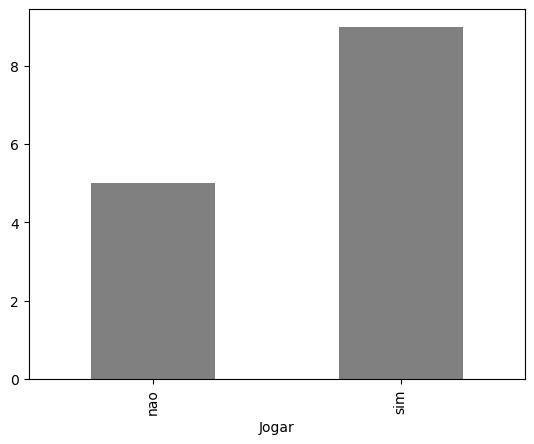

In [10]:
#plotar o gráfico de barras
agrupado.plot.bar(color='gray')

In [7]:
#vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [8]:
#Jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

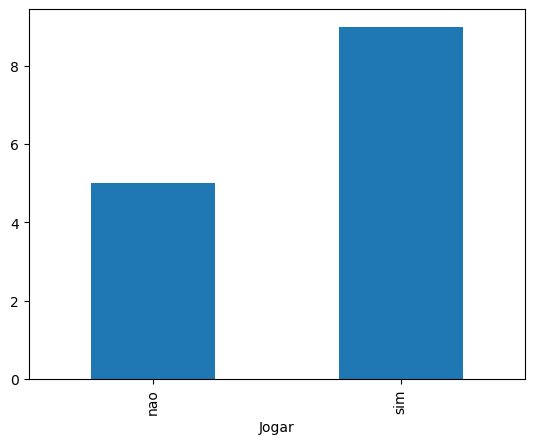

In [9]:
agrupado.plot.bar()

In [11]:
#explorar colunas numéricas
#Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

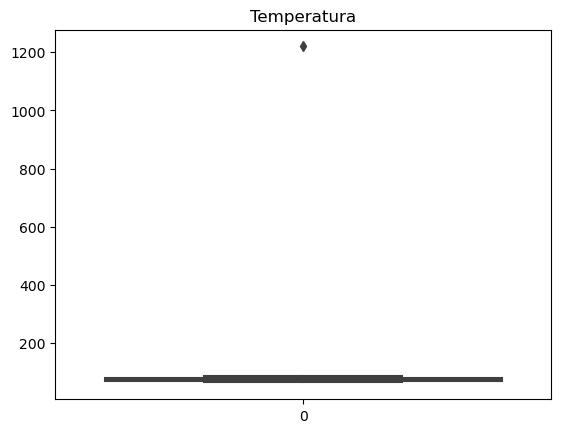

In [12]:
#boxplot
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

C:\Users\jwell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Temperatura')

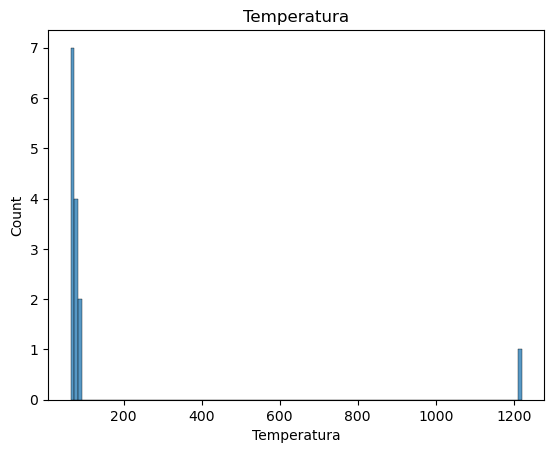

In [13]:
#histograma
srn.histplot(dataset['Temperatura']).set_title('Temperatura')

In [14]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

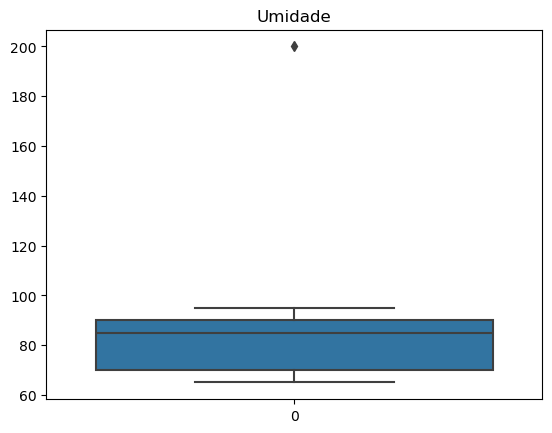

In [15]:
#boxplot
srn.boxplot(dataset['Umidade']).set_title('Umidade')

C:\Users\jwell\AppData\Local\Temp\ipykernel_1828\640715104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Umidade']).set_title('Umidade')
C:\Users\jwell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Umidade')

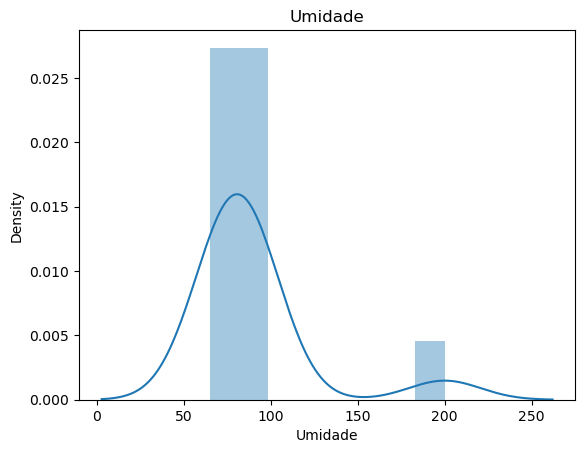

In [16]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [18]:
#contando valores NAN
#Temperatura e Umidade
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [19]:
#umidade, remover NAN e substituir pela mediana
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [20]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [21]:
#substituir NAN por mediana
dataset['Umidade'].fillna(mediana, inplace=True)

In [22]:
#verificar se ainda existe NAN em UMIDADE
dataset['Umidade'].isnull().sum()

0

In [24]:
#Aparencia, falta de padronização e NAs
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [25]:
dataset['Aparencia'].isnull().sum()

0

In [26]:
dataset['Aparencia'].fillna('sol', inplace=True)

In [27]:
#padroniza de acordo com o dominio
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [28]:
#temperatura fora de domínio
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [30]:
#visualizar
dataset.loc[(dataset['Temperatura'] < (-130)) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [31]:
#calcular mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [35]:
#substituir
dataset.loc[(dataset['Temperatura'] < (-130)) | (dataset['Temperatura'] > 130)] = int(mediana)

In [36]:
#verificar se ainda existe valor diferente do padrão
dataset.loc[(dataset['Temperatura'] < (-130)) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [37]:
#dados duplicados, buscamos pelo VENTO
dataset[dataset.duplicated(['Vento'],keep=False)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
8,sol,69.0,70.0,FALSO,sim
10,sol,75.0,70.0,VERDADEIRO,sim
11,nublado,72.0,90.0,VERDADEIRO,sim


In [38]:
#Verificarndo se ainda há outliers
dataset['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [39]:
#reexibindo dados tratados
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [40]:
dataset.shape

(14, 5)